Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [4]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 

In [5]:
b1 = np.cov(salary, scoring, ddof=1)[0, 1] / np.var(salary, ddof=1)
b1

2.6205388824027653

In [7]:
b0 = scoring.mean() - b1 * salary.mean()
b0

444.17735732435955

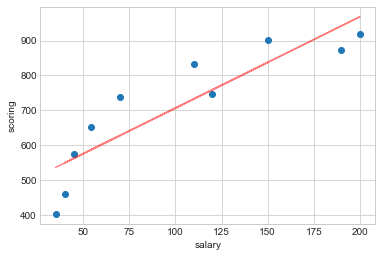

In [8]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [19]:
salary = np.array([[35], [45], [190], [200], [40], [70], [54], [150], [120], [110]])


In [16]:
salary.shape

(10, 1)

In [27]:
scoring2 = np.array([[401], [574], [874], [919], [459], [739], [653], [902], [746], [832]])

In [28]:
scoring2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [29]:
ones = np.ones((salary.shape[0], 1))
salary = np.hstack((ones, salary))

In [31]:
salary.shape
salary

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [32]:
XTX = salary.T.dot(salary)

np.linalg.det(XTX)

349464.00000000023

In [33]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary.T).dot(scoring)

print(b)

[444.17735732   2.62053888]


In [39]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 

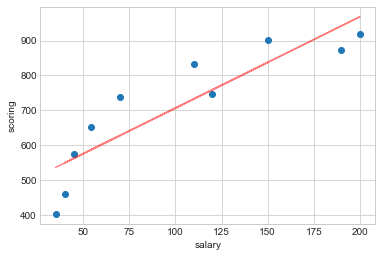

In [40]:
ox = salary
oy = b[0] + b[1] * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [41]:
print(f'real:{scoring[:5]}')
print(f'pred:{oy[:5]}')

real:[401 574 874 919 459]
pred:[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [42]:
R= 1 - ((oy - scoring).var()/scoring.var())
R

0.7876386635293686

In [43]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [45]:
mean_approximation_error(scoring, oy)

0.11469251843561705

In [46]:
#  k1=1 ,  k2=10−2=8
k1 = 1
k2 = 10

F1 = (R / k1) / ((1 - R) / k2)
F1

37.08955107458064

In [47]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.9646027437307145

In [48]:
F1>F_crit

True

In [49]:
b0, b1

(444.17735732435955, 2.6205388824027653)

In [51]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
      
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [52]:
s_slope = standard_error_slope(salary, scoring, oy)
s_slope

0.48108279568516005

In [53]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

In [54]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593722, 3.7299177985461585)

In [55]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [56]:
s_intercept = standard_error_intercept(salary, scoring, oy)
s_intercept

56.46649755068153

In [57]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.96538048163626, 574.3893341670828)

Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?


In [58]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 

In [64]:
scoring_M = scoring [:5]
scoring_P = scoring [5:10]

In [66]:
scoring_M , scoring_P

(array([401, 574, 874, 919, 459]), array([739, 653, 902, 746, 832]))

In [68]:
n1 = scoring_M.shape[0]
n2 = scoring_P.shape[0]
n1, n2

(5, 5)

In [71]:
M_mean = scoring_M.mean()
P_mean = scoring_P.mean()
M_mean, P_mean

(645.4, 774.4)

In [76]:
scoring_mean = scoring.mean()
scoring_mean

709.9

In [77]:
S2_b = n1 * (M_mean - scoring_mean) ** 2 + n2 * (P_mean - scoring_mean) ** 2 

S2_w = ((scoring_M - M_mean) ** 2).sum() + ((scoring_P - P_mean) ** 2).sum()

S2_b, S2_w

(41602.5, 263086.39999999997)

In [78]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(41602.5, 32885.799999999996)

In [79]:
F = sigma2_b / sigma2_w
F

1.2650596914169643

In [80]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

In [81]:
F>F_crit

False

*Не является статистически значимым*

Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [82]:
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

{'x1': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
 'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
 'x2': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
 'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
 'x3': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
 'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
 'x4': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
 'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}

In [83]:
x1= np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1= np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [97]:
x1_mean = x1.mean()
y1_mean = y1.mean()
x1_mean, y1_mean

(9.0, 7.500909090909093)

In [88]:
y1.var(), x1.var()

(3.7520628099173554, 10.0)

In [91]:
cov = ((x1 - x1_mean)*(y1-y1_mean)).sum()/(x1.shape[0]-1)

corr = cov/(x1.std()*y1.std())
corr

0.8980625679793239

In [92]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b0 = y1.mean() - b1 * x1.mean()
b0 , b1

(3.0000909090909094, 0.5000909090909093)

In [93]:
ox = x1
oy = b0 + b1 * ox
ox, oy

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.001     ,  7.00081818,  9.50127273,  7.50090909,  8.50109091,
        10.00136364,  6.00063636,  5.00045455,  9.00118182,  6.50072727,
         5.50054545]))

In [95]:
x2= np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

In [98]:
x2_mean = x2.mean()
y2_mean = y2.mean()
x2_mean, y2_mean

(9.0, 7.50090909090909)

In [99]:
y2.var(), x2.var()

(3.752390082644628, 10.0)

In [116]:
cov_2 = ((x2 - x2_mean)*(y2-y2_mean)).sum()/(x2.shape[0]-1)

corr_2 = cov_2/(x2.std()*y2.std())
corr_2

0.8978601566002669

In [109]:
b1_2 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b0_2 = y2.mean() - b1_2 * x2.mean()
b0_2 , b1_2

(3.00090909090909, 0.5)

In [110]:
ox_2 = x2
oy_2 = b0_2 + b1_2 * ox_2
ox_2, oy_2

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.00090909,  7.00090909,  9.50090909,  7.50090909,  8.50090909,
        10.00090909,  6.00090909,  5.00090909,  9.00090909,  6.50090909,
         5.50090909]))

In [103]:
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3=np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

In [104]:
x3_mean = x3.mean()
y3_mean = y3.mean()
x3_mean, y3_mean

(9.0, 7.5)

In [105]:
y3.var(), x3.var()

(3.747836363636364, 10.0)

In [115]:
cov_3 = ((x3 - x3_mean)*(y3-y3_mean)).sum()/(x3.shape[0]-1)

corr_3 = cov_3/(x3.std()*y3.std())
corr_3

0.897915413438558

In [108]:
b1_3 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b0_3 = y3.mean() - b1_3 * x3.mean()
b0_3 , b1_3

(3.0024545454545457, 0.49972727272727274)

In [111]:
ox_3 = x3
oy_3 = b0_3 + b1_3 * ox_3
ox_3, oy_3

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([7.99972727, 7.00027273, 9.49890909, 7.5       , 8.49945455,
        9.99863636, 6.00081818, 5.00136364, 8.99918182, 6.50054545,
        5.50109091]))

In [112]:
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [113]:
x4_mean = x4.mean()
y4_mean = y4.mean()
x4_mean, y4_mean

(9.0, 7.500909090909091)

In [114]:
y4.var(), x4.var()

(3.7484082644628103, 10.0)

In [117]:
cov_4 = ((x4 - x4_mean)*(y4-y4_mean)).sum()/(x4.shape[0]-1)

corr_4 = cov_4/(x4.std()*y4.std())
corr_4

0.8981735805773532

In [118]:
b1_4 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)
b0_4 = y4.mean() - b1_4 * x4.mean()
b0_4 , b1_4

(3.0017272727272735, 0.49990909090909086)

In [119]:
ox_4 = x4
oy_4 = b0_4 + b1_4 * ox_4
ox_4, oy_4

(array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.]),
 array([ 7.001,  7.001,  7.001,  7.001,  7.001,  7.001,  7.001, 12.5  ,
         7.001,  7.001,  7.001]))

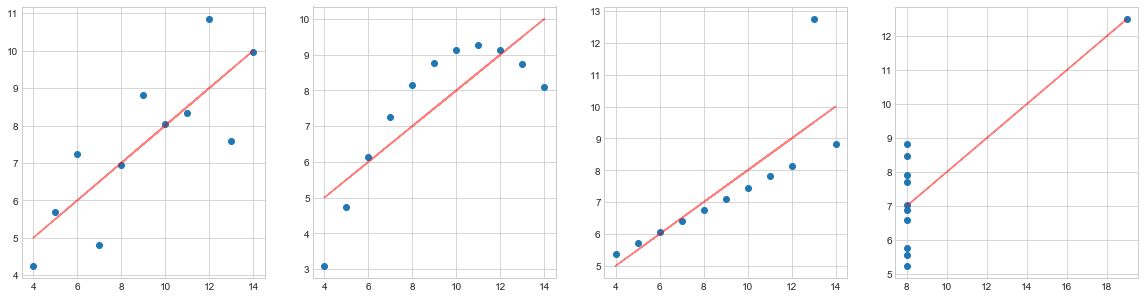

In [135]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20, 5)

ax1.scatter(x1, y1)
ax1.plot(ox, oy, color='red', alpha=0.5)

ax2.scatter(x2, y2)
ax2.plot(ox_2, oy_2, color='red', alpha=0.5)

ax3.scatter(x3, y3)
ax3.plot(ox_3, oy_3, color='red', alpha=0.5)

ax4.scatter(x4, y4)
ax4.plot(ox_4, oy_4, color='red', alpha=0.5)


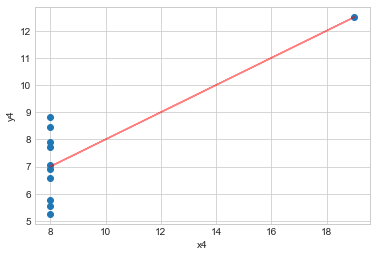

In [124]:
plt.scatter(x4, y4)
plt.plot(ox_4, oy_4, color='red', alpha=0.5)

plt.xlabel('x4')
plt.ylabel('y4');

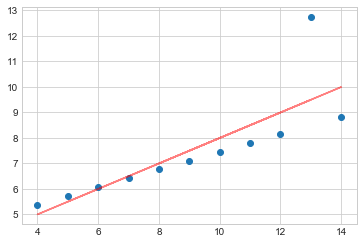

In [129]:
plt.scatter(x3, y3)
plt.plot(ox_3, oy_3, color='red', alpha=0.5)

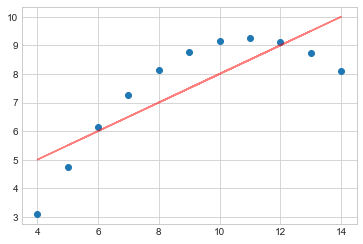

In [130]:
plt.scatter(x2, y2)
plt.plot(ox_2, oy_2, color='red', alpha=0.5)

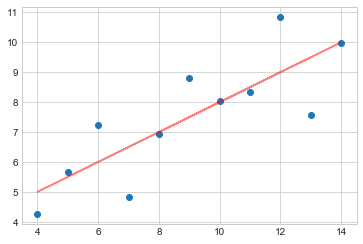

In [131]:
plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)